In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

plt.rc('font', family='AppleGothic')

# 맥 폰트 
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('/Users/dongyokim/main/jupyter/2022:2/Movie_Project/데이터 원본/영화제목/KOBIS_개봉일람_2022-09-26.xlsx', skiprows=[0, 1, 2, 3, 4])

In [3]:

def Movie_Preprocessing(data):
    # 열이름 변경 
    data.rename(columns={'전국':'전국 스크린수','전국.1':'전국 매출액', '전국.2':'전국 관객수', '서울':'서울 매출액', '서울.1':'서울 관객수'}, inplace=True)
    data.drop(0, axis=0, inplace=True)

    # 순번, 영화 유형 열 삭제
    data.drop(columns=['순번', '영화유형'], axis=1, inplace=True)
    # 인덱스 초기화
    data.reset_index(drop=True, inplace=True)

    # 2022-07월 이후에 개봉한 영화 출력후 삭제
    delete_index = list(data[data['개봉일'] >= '2022-07-01'].index)
    data.drop(delete_index, axis=0, inplace=True) # 인덱스 초기화
    data.reset_index(drop=True, inplace=True)
                        
    # 장르: 성인물(에로) 영화 모두 삭제
    delete_index = list(data[data['장르'] == '성인물(에로)'].index)
    data.drop(delete_index, axis=0, inplace=True) # 인덱스 초기화
    data.reset_index(drop=True, inplace=True)
                            
    # 장르: 공연 모두 삭제(장르가 공연인 행들은 감독이 없는 문제 발생)
    delete_index = list(data[data['장르'] == '공연'].index)
    data.drop(delete_index, axis=0, inplace=True) # 인덱스 초기화
    data.reset_index(drop=True, inplace=True)

    # 전국 관객수가 100명 이하인 영화들 다 삭제(이상한 영화들이 많음,,)
    delete_index = list(data[data['전국 관객수'] <= 100].index)
    data.drop(delete_index, axis=0, inplace=True) # 인덱스 초기화
    data.reset_index(drop=True, inplace=True)

    # 장르 서부극 데이터가 1개 밖에 없어서 삭제해주자 
    delete_index = list(data[data['장르'] =='서부극(웨스턴)'].index)
    data.drop(delete_index, axis=0, inplace=True) # 인덱스 초기화
    data.reset_index(drop=True, inplace=True)

    return data 

In [4]:
movie_data = Movie_Preprocessing(data)

In [5]:
movie_data.head()

,영화명,감독,제작사,수입사,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화
1,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,33577136860,3597963,액션,12세이상관람가,일반영화
2,겨울왕국 2,"크리스 벅,제니퍼 리",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-11-21,장편,미국,2648,114810421450,13747792,28824682580,3225974,애니메이션,전체관람가,일반영화
3,범죄도시 2,이상용,"주식회사 빅펀치픽쳐스,(주)홍필름,(주)비에이엔터테인먼트",NaN,"주식회사 에이비오엔터테인먼트,메가박스중앙(주)플러스엠",2022-05-18,장편,한국,2498,131293186879,12692947,29072018770,2755693,범죄,15세이상관람가,일반영화
4,알라딘,가이 리치,NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-05-23,장편,미국,1311,106983620359,12555894,30218911039,3377404,어드벤처,전체관람가,일반영화


In [6]:
# DataFrame 구조 
movie_data.shape

(2865, 16)

In [7]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      2865 non-null   object        
 1   감독       2625 non-null   object        
 2   제작사      1125 non-null   object        
 3   수입사      1634 non-null   object        
 4   배급사      2862 non-null   object        
 5   개봉일      2865 non-null   datetime64[ns]
 6   영화형태     2865 non-null   object        
 7   국적       2865 non-null   object        
 8   전국 스크린수  2865 non-null   object        
 9   전국 매출액   2865 non-null   object        
 10  전국 관객수   2865 non-null   object        
 11  서울 매출액   2865 non-null   object        
 12  서울 관객수   2865 non-null   object        
 13  장르       2857 non-null   object        
 14  등급       2865 non-null   object        
 15  영화구분     2865 non-null   object        
dtypes: datetime64[ns](1), object(15)
memory usage: 358.2+ KB


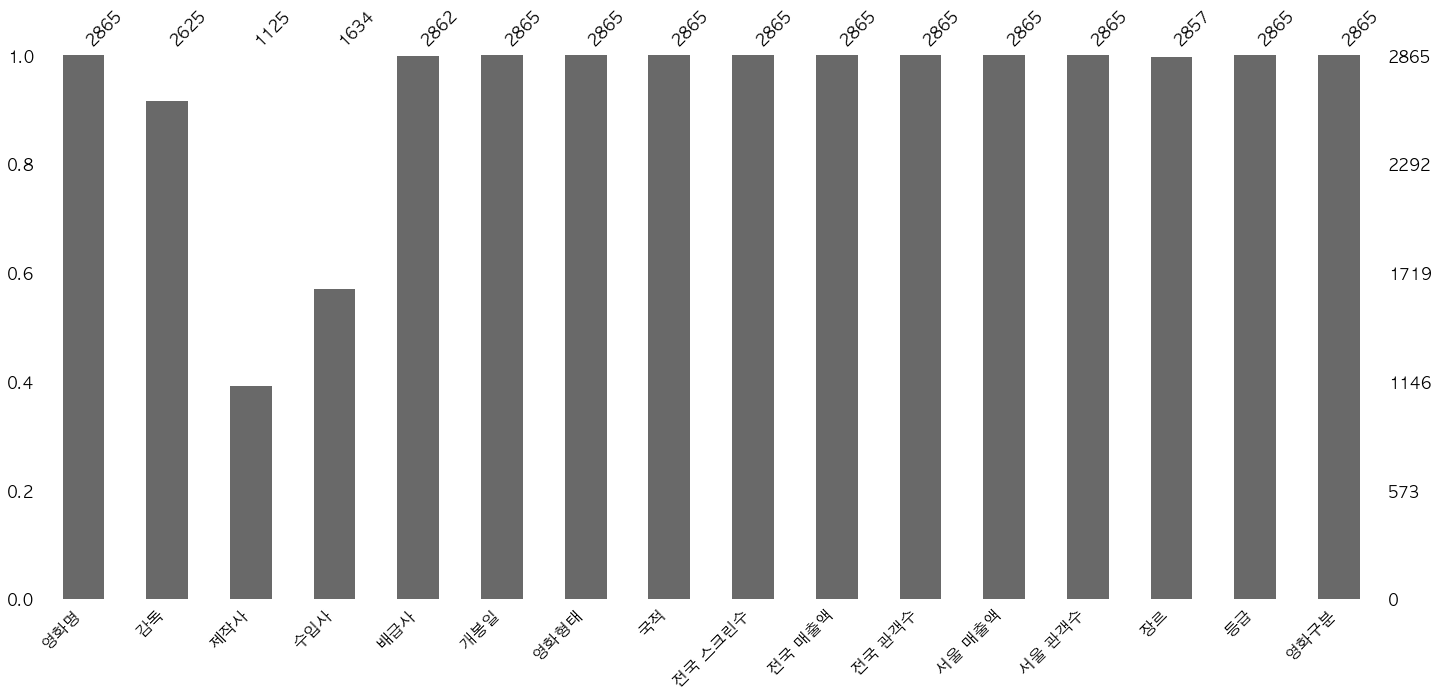

In [166]:
msno.bar(movie_data)
plt.show()

In [165]:
# 감독을 채워줘야 될 거 같은데 방법을 모르겠다.,
movie_data[movie_data['감독'].isnull()]

,영화명,감독,제작사,수입사,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
312,프리즌 이스케이프,NaN,NaN,주식회사 풍경소리,(주)이놀미디어,2020-05-06,장편,영국,328,1848297600,217056,556477740,63837,어드벤처,12세이상관람가,독립/예술영화
397,로스트 시티,NaN,NaN,롯데컬처웍스(주)롯데엔터테인먼트,롯데컬처웍스(주)롯데엔터테인먼트,2022-04-20,장편,미국,835,1023084850,113186,358122500,41462,액션,12세이상관람가,일반영화
475,카운트다운,NaN,NaN,(유)조이앤시네마,"(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온",2019-12-12,장편,미국,238,611133000,73412,188656500,22405,공포(호러),15세이상관람가,일반영화
490,더 플랫폼,NaN,NaN,주식회사 더쿱,(주)홈초이스,2020-05-13,장편,스페인,228,603715000,65938,212466200,23133,SF,청소년관람불가,독립/예술영화
536,젝스키스 에이틴,NaN,(주)와이지엔터테인먼트,NaN,씨제이 씨지브이(CJ CGV)(주),2018-01-18,장편,한국,25,364405500,50419,225891500,29333,다큐멘터리,전체관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796,성적유희의 극한적 경험,NaN,NaN,NaN,(유)조이앤시네마,2022-03-16,장편,독일,5,366000,126,100000,20,드라마,청소년관람불가,독립/예술영화
2798,IS 탈출,NaN,NaN,(주)영화사내일,씨네라인월드(주),2021-04-15,장편,기타,5,623000,124,600000,120,액션,15세이상관람가,독립/예술영화
2806,허리 고 라운드,NaN,NaN,NaN,(주)미디어캐슬,2021-07-14,장편,일본,4,1210800,122,1129800,115,다큐멘터리,15세이상관람가,독립/예술영화
2823,미라클 문 페스티벌 츠키우타. 버추얼 라이브 2019 사계 딜레이 뷰잉 ~가을 버전~,NaN,NaN,NaN,NaN,2019-12-22,장편,일본,1,3510000,117,3510000,117,애니메이션,전체관람가,일반영화


In [8]:
# 엑셀 파일로 추출
data.to_excel('영화 제목 및 정보 main_dataset_10_3.xlsx')